In [1]:
from VariationalBayes.SparseObjectives import * 
import VariationalBayes as vb
import autograd.numpy as np
import autograd.numpy as sp

import matplotlib.pyplot as plt
%matplotlib inline


10


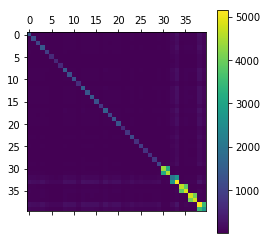

In [2]:
def check_objective(obj):
    free_par = obj.par.get_free()
    vec_par = obj.par.get_vector()

    obj.fun_free(free_par)
    grad = obj.fun_free_grad(free_par)
    obj.fun_free_hessian(free_par)
    obj.fun_free_hvp(free_par, grad)

    obj.fun_vector(vec_par)
    grad = obj.fun_vector_grad(vec_par)
    obj.fun_vector_hessian(vec_par)
    obj.fun_vector_hvp(vec_par, grad)

    
mp = vb.ModelParamsDict('test')
mp.push_param(vb.ArrayParam(name='global', shape=(2, 3, 5), lb=1.0))
mp.push_param(vb.SimplexParam(name='local', shape=(5, 3)))

class Model(object):
    def __init__(self, mp):
        self.mp = mp
        
    def fun(self):
        a = self.mp['global'].get()
        s = self.mp['local'].get()
        return (np.sum(a) * np.sum(s ** 2)) ** 2
    
model = Model(mp)
model.fun()

# The whole model
obj = Objective(model.mp, model.fun)
free_par = np.random.random(obj.par.free_size())
obj.par.set_free(free_par)
check_objective(obj)

hess = obj.fun_free_hessian(obj.par.get_free())
plt.matshow(np.abs(hess)); plt.colorbar()

# A single parameter.
obj_a = Objective(model.mp['global'], model.fun)
check_objective(obj_a)
print(mp['local'].free_size())


In [3]:
print(list(model.mp.param_dict.keys()))

['global', 'local']


In [5]:
# The whole model
def max_diff(a, b):
    diff = np.max(np.abs(a - b))
    print(diff)
    return diff

spobj = SparseObjective(par=model.mp, fun=model.fun)
vec_par = model.mp.get_vector()
global_vec_par = model.mp['global'].get_vector()
local_vec_par = model.mp['local'].get_vector()

max_diff(spobj.fun_vector_grad_split(global_vec_par, local_vec_par),
         obj.fun_vector_grad(vec_par))
max_diff(spobj.fun_vector_hessian_split(global_vec_par, local_vec_par),
      obj.fun_vector_hessian(vec_par))
max_diff(spobj.fun_free_grad(free_par), obj.fun_free_grad(free_par))
max_diff(spobj.fun_free_hessian(free_par), obj.fun_free_hessian(free_par))

print('okey dokey')


0.0
5.68434188608e-14
1.81898940355e-12
2.72848410532e-12


2.7284841053187847e-12